In [4]:
import numpy as np 
import pandas as pd

In [5]:
pf = pd.read_csv("spam.csv",encoding = 'latin-1')

In [6]:
pf.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3386,ham,So u workin overtime nigpun?,NaN,NaN,NaN
5180,ham,Babe! I fucking love you too !! You know? Fuck...,NaN,NaN,NaN
4499,ham,Nvm take ur time.,NaN,NaN,NaN
813,ham,I borrow ur bag ok.,NaN,NaN,NaN
648,ham,No prob. I will send to your email.,NaN,NaN,NaN


1. Data cleaning

In [7]:
#checking shape of data 
pf.shape

(5572, 5)

In [8]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop column which is not useful - last 3 column 
pf.drop(columns = ['Unnamed: 2' ,'Unnamed: 3' , 'Unnamed: 4'],inplace = True)

In [10]:
pf.sample(5)

,v1,v2
4458,spam,Welcome to UK-mobile-date this msg is FREE giv...
992,ham,Up to Ì_... ÌÏ wan come then come lor... But i...
1514,ham,K:)all the best:)congrats...
5061,ham,Havent stuck at orchard in my dad's car. Going...
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...


In [11]:
#renaming the column using dictionary
pf.rename(columns ={'v1':'target' , 'v2':'text'} , inplace = True)
pf.sample(5)

,target,text
2420,ham,Oic... Then better quickly go bathe n settle d...
4600,spam,FreeMsg: Txt: CALL to No: 86888 & claim your r...
243,ham,Although i told u dat i'm into baig face watch...
2144,spam,FreeMsg: Hey - I'm Buffy. 25 and love to satis...
1318,ham,Ok...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
pf['target'] = encoder.fit_transform(pf['target'])

In [14]:
pf.sample(5)

,target,text
5085,0,Sorry i missed your call. Can you please call ...
2003,0,S....s...india going to draw the series after ...
917,0,"When people see my msgs, They think Iam addict..."
3613,0,Ok c Ì_ then.
128,0,HEY GIRL. HOW R U? HOPE U R WELL ME AN DEL R B...


In [15]:
#always check missing value 
pf.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#checking duplicated value
pf.duplicated().sum()

403

In [17]:
pf = pf.drop_duplicates(keep = 'first')

In [18]:
pf.duplicated().sum()

0

In [19]:
pf.shape

(5169, 2)

## EDA ( exploritary data modaling)

In [20]:
#Analysis
pf.head

<bound method NDFrame.head of       target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5169 rows x 2 columns]>

In [21]:
pf['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

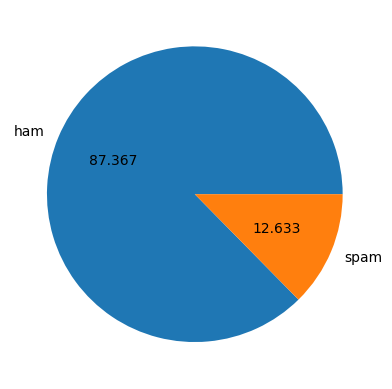

In [22]:
import matplotlib.pyplot as plt 
plt.pie(pf['target'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [23]:
#it implies data is imbalance because there are huge diffrence between ham and spam

In [35]:
#recognizing no of character in sms
#no of words in the sms 
#no of sentence in sms 
#we use nltk (natural language library)

import nltk
pf['num_character']= pf['text'].apply(len)

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
#no of words
pf.head()
 #pf['text'].apply(lambda x:(nltk.word_tokenize(x)))

,target,text,num_words,sentence_lent,num_character
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [38]:
pf['num_words']=pf['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [39]:
pf.head

<bound method NDFrame.head of       target                                               text  num_words  \
0          0  Go until jurong point, crazy.. Available only ...         24   
1          0                      Ok lar... Joking wif u oni...          8   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...         37   
3          0  U dun say so early hor... U c already then say...         13   
4          0  Nah I don't think he goes to usf, he lives aro...         15   
...      ...                                                ...        ...   
5567       1  This is the 2nd time we have tried 2 contact u...         35   
5568       0              Will Ì_ b going to esplanade fr home?          9   
5569       0  Pity, * was in mood for that. So...any other s...         15   
5570       0  The guy did some bitching but I acted like i'd...         27   
5571       0                         Rofl. Its true to its name          7   

      sentence_lent  num_characte

In [40]:
pf.head()

,target,text,num_words,sentence_lent,num_character
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [41]:
#no of sentences in the a message 
pf['sentence_lent']=pf['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [42]:
pf.head()

,target,text,num_words,sentence_lent,num_character
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [43]:
pf[['num_character','num_words','sentence_lent']].describe()

,num_character,num_words,sentence_lent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
pf[pf['target'] == 0][['num_character','num_words','sentence_lent']].describe()

,num_character,num_words,sentence_lent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
#ham average 

pf[pf['target'] == 1][['num_character','num_words','sentence_lent']].describe()


,num_character,num_words,sentence_lent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [46]:
#histogram 
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

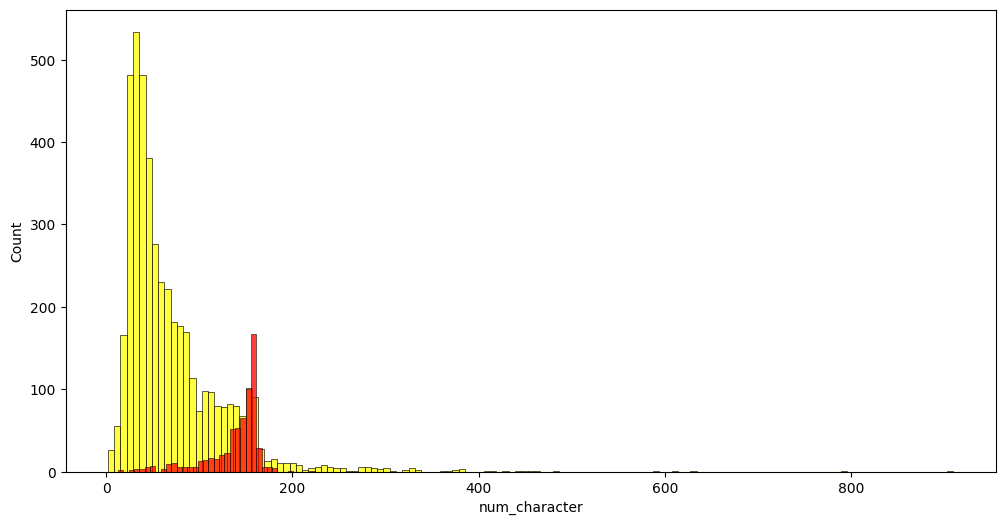

In [47]:
plt.figure(figsize= (12,6))
sns.histplot(pf[pf['target'] == 0]['num_character'],color= 'yellow')
sns.histplot(pf[pf['target'] == 1]['num_character'],color= 'red')

<Axes: xlabel='num_words', ylabel='Count'>

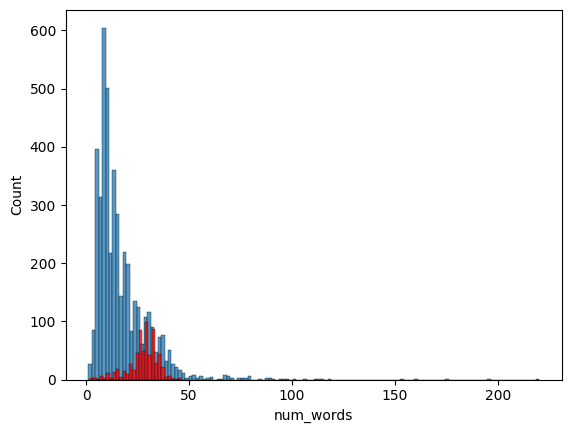

In [48]:
#checking historgram over words
sns.histplot(pf[pf['target'] == 0]['num_words'])
sns.histplot(pf[pf['target'] == 1]['num_words'],color= 'red')


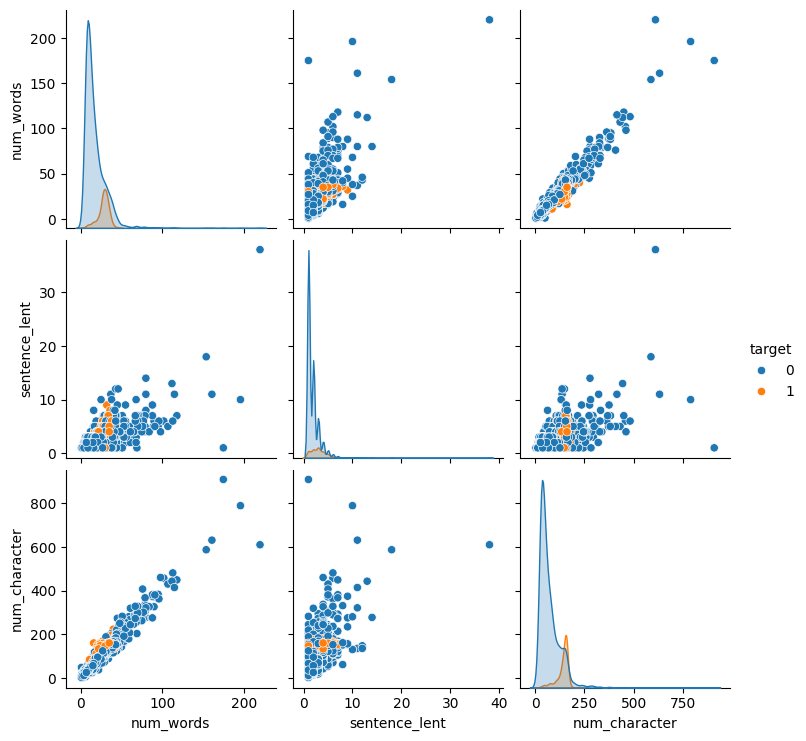

In [49]:
sns.pairplot(pf,hue= 'target')

<Axes: >

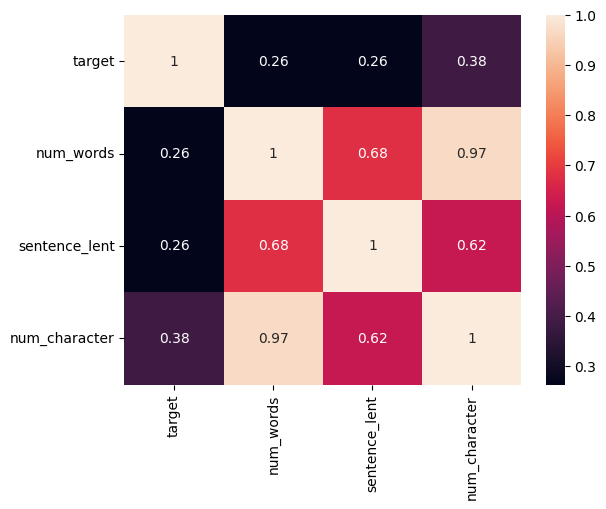

In [50]:
#pearson cofficent 
#pf.corr(numeric_only = True)

#heat map 

sns.heatmap(pf.corr(numeric_only = True),annot = True)
#annot stands for annotation -> shows the realtional value of each square

In [51]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

3.Data preprocessing
Lower case 
tokenization
removing special characcters
removing stop words and punctuation
stemming

In [56]:
#converting every text into lower case
#creating a function
#working of this function
# tokenize every word into list


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
#creating list
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
        #we don't copy list like text = y but as test = y[:] called cloan
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    #stemming(converting words into base words or root words)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [59]:

transform_text('Hey! My name is Abhishek Kumar')

'hey name abhishek kumar'

In [60]:
pf['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [61]:
transform_text(pf['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [62]:
ps= PorterStemmer()
ps.stem('huging')

'huge'

In [63]:
#after stemming 
transform_text('I love playing cricket. Watching it is a wow scene !')

'love play cricket watch wow scene'

In [64]:
pf['transformed_text'] = pf['text'].apply(transform_text)

In [65]:
pf.head()

,target,text,num_words,sentence_lent,num_character,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah think goe usf live around though


In [66]:
pf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5169, dtype: bool

In [67]:
pf.duplicated().sum()

0

In [68]:
pf.isnull().sum()

target              0
text                0
num_words           0
sentence_lent       0
num_character       0
transformed_text    0
dtype: int64

In [69]:
import wordcloud

In [70]:
#creating word cloud which bold the important word in spam and ham 
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 ,min_font_size= 10, background_color = 'yellow')

In [73]:
spam_wc = wc.generate(pf[pf['target'] ==1]['transformed_text'].str.cat(sep = " "))

In [74]:
import matplotlib.pyplot as plt
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

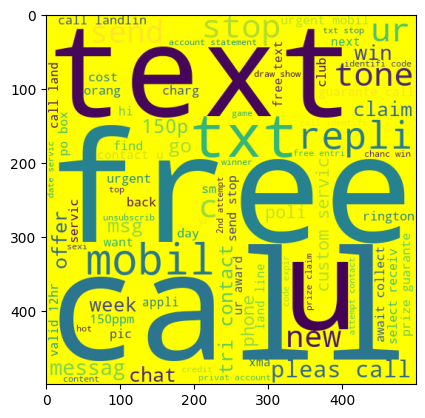

In [75]:
#plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [76]:
ham_wc = wc.generate(pf[pf['target'] ==0]['transformed_text'].str.cat(sep = " "))

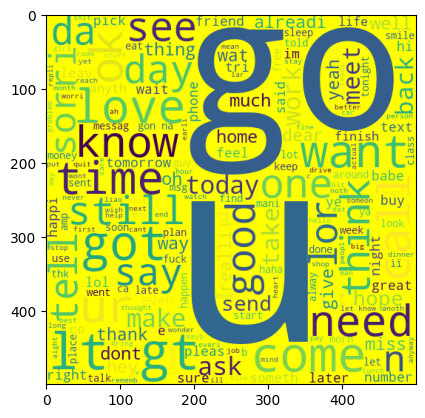

In [77]:
plt.imshow(ham_wc)

In [79]:
#checking top 30 words in spam and ham 
spam_corpus = []
for msg in pf[pf['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [93]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

<Axes: ylabel='0'>

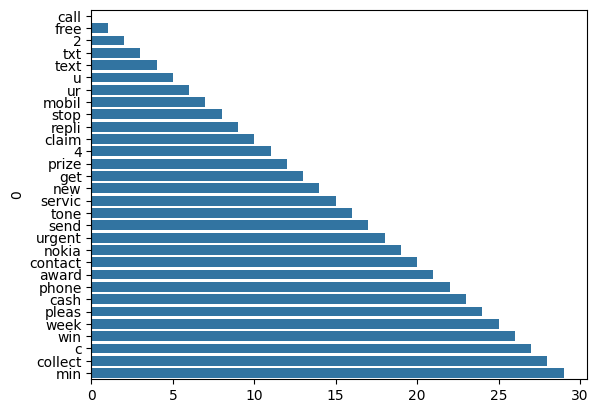

In [92]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],)

In [94]:
ham_corpus = []
for msg in pf[pf['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

<Axes: ylabel='0'>

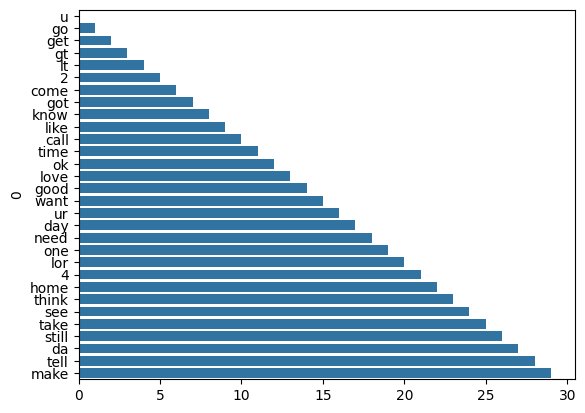

In [97]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],)

4.Model Building 
.text data pe sabse acha naive bayes algorithm use 


In [219]:
#in this data target is in number form and input is in text format
#we change the text into vector by vectorization 
#we use bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#CountVectorizer = Bag of Words 
tfidf= TfidfVectorizer(max_features = 3000)
cv = CountVectorizer()

In [220]:
X = tfidf.fit_transform(pf['transformed_text']).toarray()

In [221]:
X.shape

(5169, 3000)

In [243]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [244]:
y = pf['target'].values

In [245]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB

In [248]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [249]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 3)

In [250]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8660541586073501
[[1549  249]
 [  28  242]]
0.49287169042769857


In [251]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9816247582205029
[[1789    9]
 [  29  241]]
0.964


In [252]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[1795    3]
 [  43  227]]
0.9869565217391304


In [253]:
#because data is imbalance we take precision score as main parameter
#using more model to check which model is fit to predict our data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

In [254]:
svc = SVC(kernel = 'sigmoid' , gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression( penalty='l1', solver='liblinear')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)

In [255]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
}


In [256]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score ( y_test, y_pred)
    precision = precision_score (y_test, y_pred)
    return accuracy, precision

In [257]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.9559961315280464, 0.949748743718593)

In [258]:
acc_score = [] #accuracy_score array history
pre_score = [] #precisio-score array history

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    print(" For " , name)
    print ("Accuracy ", current_accuracy)
    print ("Precisio ", current_precision)

    acc_score.append(current_accuracy)
    pre_score.append(current_precision)
    

 For  SVC
Accuracy  0.9656673114119922
Precisio  0.9128630705394191
 For  KN
Accuracy  0.9086073500967118
Precisio  1.0
 For  NB
Accuracy  0.9816247582205029
Precisio  0.964
 For  DT
Accuracy  0.9327852998065764
Precisio  0.8291457286432161
 For  LR
Accuracy  0.9559961315280464
Precisio  0.949748743718593
 For  RF
Accuracy  0.9676015473887815
Precisio  1.0
 For  AdaBoost
Accuracy  0.9647001934235977
Precisio  0.9377777777777778
 For  BgC
Accuracy  0.9540618955512572
Precisio  0.8571428571428571
 For  ETC
Accuracy  0.9729206963249516
Precisio  1.0
 For  GBDT
Accuracy  0.9448742746615088
Precisio  0.9642857142857143


In [217]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy' : acc_score, 'Precision' : pre_score}).sort_values('Precision',ascending = False)

In [218]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.891199,1.000000
2,NB,0.947292,1.000000
5,RF,0.971470,1.000000
8,ETC,0.966634,1.000000
9,GBDT,0.946809,0.959770
0,SVC,0.968569,0.959641
4,LR,0.944874,0.923913
6,AdaBoost,0.961799,0.913420
7,BgC,0.961315,0.913043
3,DT,0.934720,0.829268


In [175]:

#sns.catplot(x = 'Algorithm' , y = 'value', hue = 'variable', data = performance_df1,
 #           kind = 'bar',height = 5)
#plt.ylim(0.5,1.0)
#plt.xticks(rotation = 'vertical')
#plt.show()

In [ ]:
# Model Improvement
# 1. Change the max_feature 

In [237]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy_3000' : acc_score, 'Precision_3000' : pre_score}).sort_values('Precision_3000',ascending = False)

In [238]:
temp_df

,Algorithm,Accuracy_3000,Precision_3000
1,KN,0.913443,1.000000
2,NB,0.971954,1.000000
5,RF,0.967602,1.000000
8,ETC,0.972921,1.000000
9,GBDT,0.944874,0.964286
0,SVC,0.970503,0.948498
6,AdaBoost,0.964700,0.937778
4,LR,0.947292,0.930481
7,BgC,0.954062,0.857143
3,DT,0.931818,0.827411


In [241]:
performance_df.merge(temp_df ,on= 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000
0,KN,0.891199,1.000000,0.913443,1.000000
1,NB,0.947292,1.000000,0.971954,1.000000
2,RF,0.971470,1.000000,0.967602,1.000000
3,ETC,0.966634,1.000000,0.972921,1.000000
4,GBDT,0.946809,0.959770,0.944874,0.964286
5,SVC,0.968569,0.959641,0.970503,0.948498
6,LR,0.944874,0.923913,0.947292,0.930481
7,AdaBoost,0.961799,0.913420,0.964700,0.937778
8,BgC,0.961315,0.913043,0.954062,0.857143
9,DT,0.934720,0.829268,0.931818,0.827411


In [ ]:
#we multiple algorithm like 
#we can do some scaling and 

In [260]:
scaler_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Scaler_accuracy': acc_score, 'Scaler_precision' : pre_score}).sort_values('Scaler_precision', ascending = False)

In [261]:
scaler_df

,Algorithm,Scaler_accuracy,Scaler_precision
1,KN,0.908607,1.000000
5,RF,0.967602,1.000000
8,ETC,0.972921,1.000000
9,GBDT,0.944874,0.964286
2,NB,0.981625,0.964000
4,LR,0.955996,0.949749
6,AdaBoost,0.964700,0.937778
0,SVC,0.965667,0.912863
7,BgC,0.954062,0.857143
3,DT,0.932785,0.829146


In [263]:
performance_df.merge(temp_df.merge(scaler_df,on= 'Algorithm'))

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000,Scaler_accuracy,Scaler_precision
0,KN,0.891199,1.000000,0.913443,1.000000,0.908607,1.000000
1,NB,0.947292,1.000000,0.971954,1.000000,0.981625,0.964000
2,RF,0.971470,1.000000,0.967602,1.000000,0.967602,1.000000
3,ETC,0.966634,1.000000,0.972921,1.000000,0.972921,1.000000
4,GBDT,0.946809,0.959770,0.944874,0.964286,0.944874,0.964286
5,SVC,0.968569,0.959641,0.970503,0.948498,0.965667,0.912863
6,LR,0.944874,0.923913,0.947292,0.930481,0.955996,0.949749
7,AdaBoost,0.961799,0.913420,0.964700,0.937778,0.964700,0.937778
8,BgC,0.961315,0.913043,0.954062,0.857143,0.954062,0.857143
9,DT,0.934720,0.829268,0.931818,0.827411,0.932785,0.829146


In [264]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))